In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Load dataset
data = pd.read_csv('cleaned_data.csv')


# Add a new column for price per square meter, avoiding division by zero or null landsize values
data['Land_price_per_m2'] = data.apply(
    lambda row: row['Price'] / row['Landsize'] if pd.notnull(row['Price']) and pd.notnull(row['Landsize']) and row['Landsize'] > 0 else None,
    axis=1
)

# Display the updated dataset's first few rows to confirm the addition
data[['Price', 'Landsize', 'Land_price_per_m2']].head()


,Price,Landsize,Land_price_per_m2
0,1480000.0,202.0,7326.732673
1,1035000.0,156.0,6634.615385
2,1465000.0,134.0,10932.835821
3,850000.0,94.0,9042.553191
4,1600000.0,120.0,13333.333333


In [19]:
# Add a new column for price per square meter, avoiding division by zero or null landsize values
data['Building_price_per_m2'] = data.apply(
    lambda row: row['Price'] / row['BuildingArea'] if pd.notnull(row['Price']) and pd.notnull(row['BuildingArea']) and row['BuildingArea'] > 0 else None,
    axis=1
)

# Display the updated dataset's first few rows to confirm the addition
data[['Price', 'BuildingArea', 'Building_price_per_m2']].head()

,Price,BuildingArea,Building_price_per_m2
0,1480000.0,154.6,9573.091850
1,1035000.0,79.0,13101.265823
2,1465000.0,150.0,9766.666667
3,850000.0,117.4,7240.204429
4,1600000.0,142.0,11267.605634


In [20]:
# Add a new column for price per square meter, avoiding division by zero or null landsize values
data['Building_and_land_price_per_m2'] = data.apply(
    lambda row: row['Price'] / (row['BuildingArea'] + row['Landsize']) if pd.notnull(row['Price']) and pd.notnull(row['Landsize']) and row['Landsize'] > 0 and pd.notnull(row['BuildingArea']) and row['BuildingArea'] > 0 else None,
    axis=1
)

# Display the updated dataset's first few rows to confirm the addition
data[['Price', 'BuildingArea', 'Landsize', 'Building_and_land_price_per_m2']].head()

,Price,BuildingArea,Landsize,Building_and_land_price_per_m2
0,1480000.0,154.6,202.0,4150.308469
1,1035000.0,79.0,156.0,4404.255319
2,1465000.0,150.0,134.0,5158.450704
3,850000.0,117.4,94.0,4020.813623
4,1600000.0,142.0,120.0,6106.870229


In [21]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data['Date'].head()

0   2016-12-03
1   2016-02-04
2   2017-03-04
3   2017-03-04
4   2016-06-04
Name: Date, dtype: datetime64[ns]

## Regional Price Analysis

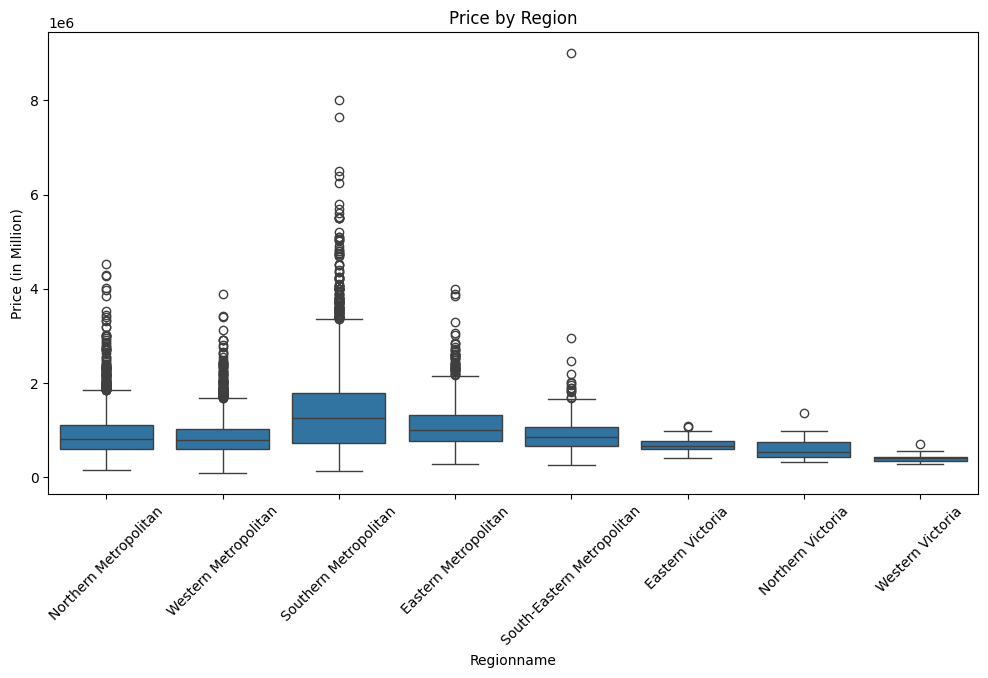

In [22]:
# Boxplots by Regions
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Regionname', y = 'Price', data = data)
plt.xticks(rotation = 45)
plt.title("Price by Region")
plt.ylabel('Price (in Million)')
plt.show()

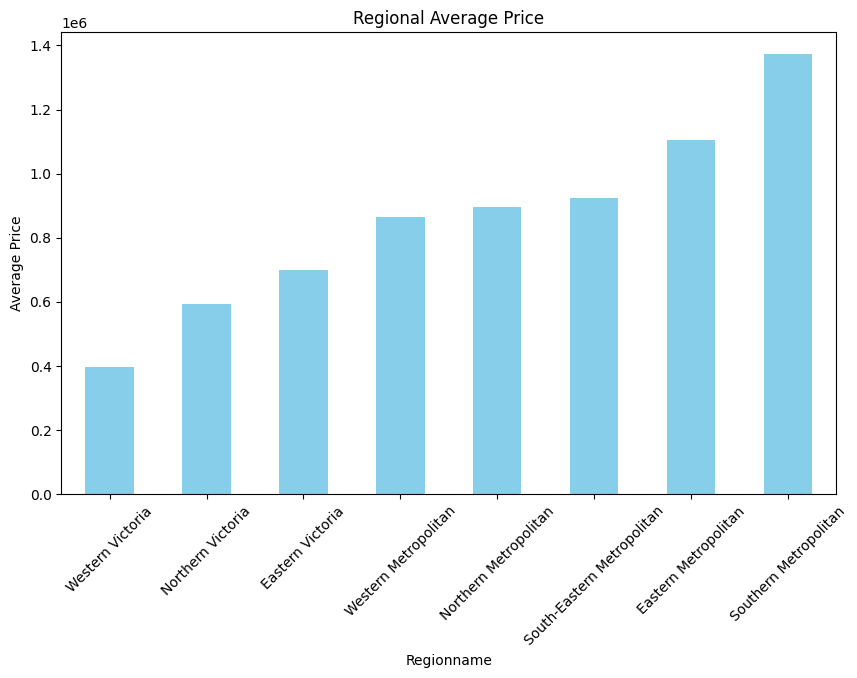

In [23]:
# Barplot of average price per region
# Group by region and calculate mean price per sqm
region_avg = data.groupby('Regionname')['Price'].mean().sort_values()

# Bar plot
plt.figure(figsize=(10, 6))
region_avg.plot(kind='bar', color='skyblue')
plt.ylabel("Average Price")
plt.title("Regional Average Price")
plt.xticks(rotation=45)
plt.show()

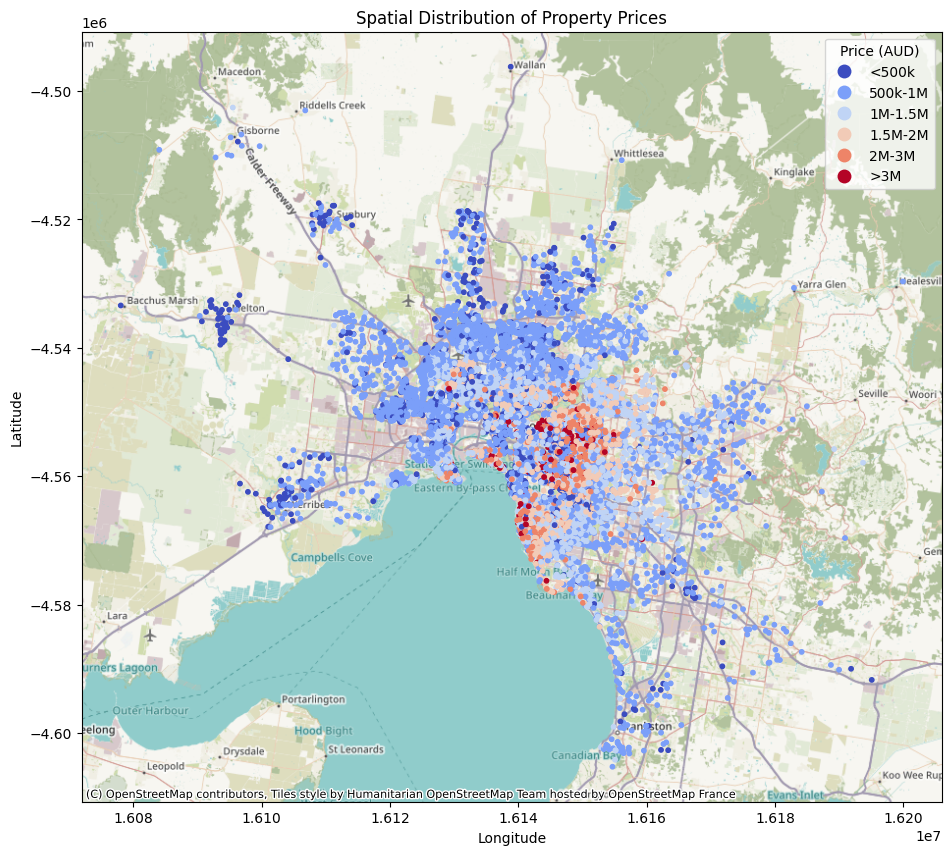

In [24]:
# Spatial Distribution of Property Prices
# Filter valid data for mapping
geo_data = data[['Lattitude', 'Longtitude', 'Price']]
gdf = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.Longtitude, geo_data.Lattitude))

# Ensure the GeoDataFrame has a CRS
gdf.set_crs(epsg=4326, inplace=True)  # Set CRS to WGS84
gdf = gdf.to_crs(epsg=3857)  # Reproject to Web Mercator (EPSG:3857)

# Categorize prices into ranges (bins)
price_bins = [0, 500000, 1000000, 1500000, 2000000, 3000000, gdf['Price'].max()]
price_labels = ['<500k', '500k-1M', '1M-1.5M', '1.5M-2M', '2M-3M', '>3M']
gdf['Price Range'] = pd.cut(gdf['Price'], bins=price_bins, labels=price_labels)

# Plot the map with categorized price ranges
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, column='Price Range', legend=True, cmap='coolwarm', markersize=10, categorical=True)

# Add title to the legend
legend = ax.get_legend()
legend.set_title("Price (AUD)")

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)
plt.title("Spatial Distribution of Property Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

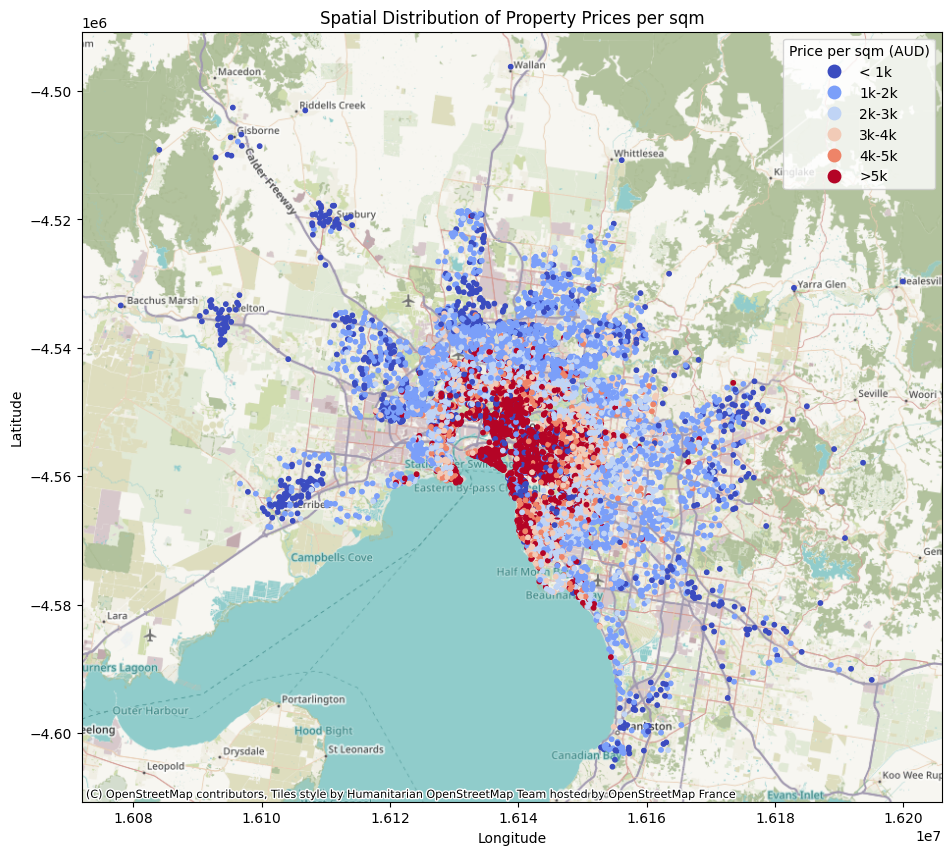

In [25]:
# Spatial Distribution of Property Prices ('Building_price_per_m2')
# Filter valid data for mapping
geo_data2 = data[['Lattitude', 'Longtitude', 'Land_price_per_m2']]
gdf = gpd.GeoDataFrame(geo_data2, geometry=gpd.points_from_xy(geo_data2.Longtitude, geo_data2.Lattitude))

# Ensure the GeoDataFrame has a CRS
gdf.set_crs(epsg=4326, inplace=True)  # Set CRS to WGS84
gdf = gdf.to_crs(epsg=3857)  # Reproject to Web Mercator (EPSG:3857)

# Categorize prices into ranges (bins)
price_bins = [0, 1000, 2000, 3000, 4000, 5000, gdf['Land_price_per_m2'].max()]
price_labels = ['< 1k', '1k-2k','2k-3k', '3k-4k', '4k-5k', '>5k']
gdf['Price Range'] = pd.cut(gdf['Land_price_per_m2'], bins=price_bins, labels=price_labels)

# Plot the map with categorized price ranges
fig, ax = plt.subplots(figsize=(12, 10))
gdf.plot(ax=ax, column='Price Range', legend=True, cmap='coolwarm', markersize=10, categorical=True)

# Add title to the legend
legend = ax.get_legend()
legend.set_title("Price per sqm (AUD)")

# Add basemap
ctx.add_basemap(ax, crs=gdf.crs)
plt.title("Spatial Distribution of Property Prices per sqm")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Marginal relationship between Price and Rooms, Bathrooms, Landsize, and Distance from CBD (for RQ2) 

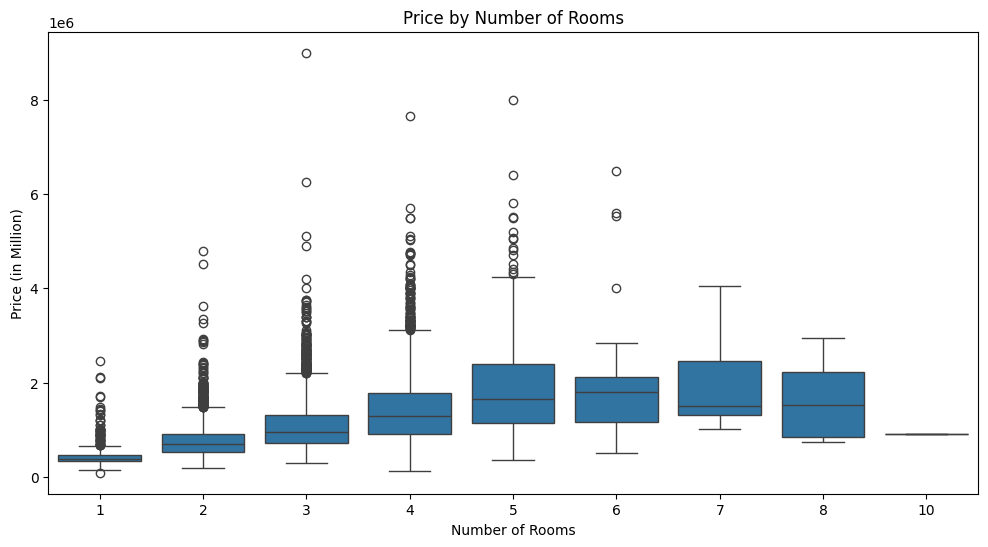

In [26]:
# Boxplots by Number of Rooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='Rooms', y='Price', data=data)
plt.title("Price by Number of Rooms")
plt.xlabel('Number of Rooms')
plt.ylabel('Price (in Million)')
plt.show()

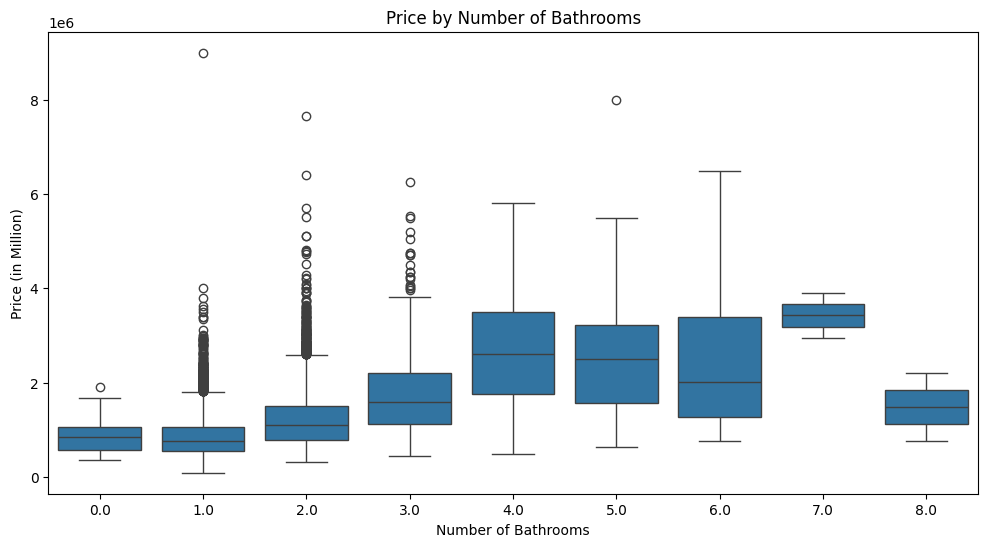

In [27]:
# Boxplots by Number of Bathrooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='Bathroom', y='Price', data=data)
plt.title("Price by Number of Bathrooms")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in Million)')
plt.show()

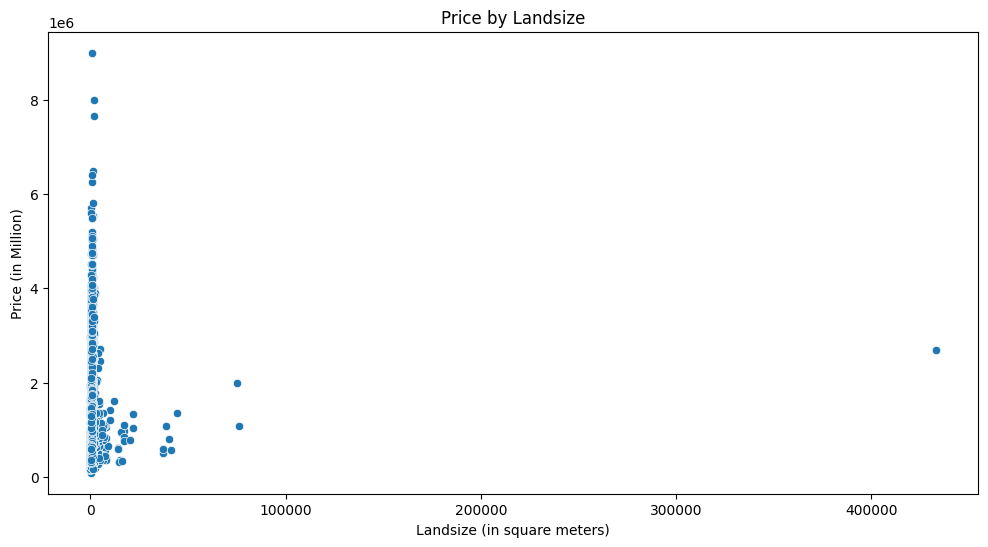

In [28]:
# Boxplot by Landsize
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Landsize', y='Price', data=data)
plt.title("Price by Landsize")
plt.xlabel('Landsize (in square meters)')
plt.ylabel('Price (in Million)')
plt.show()

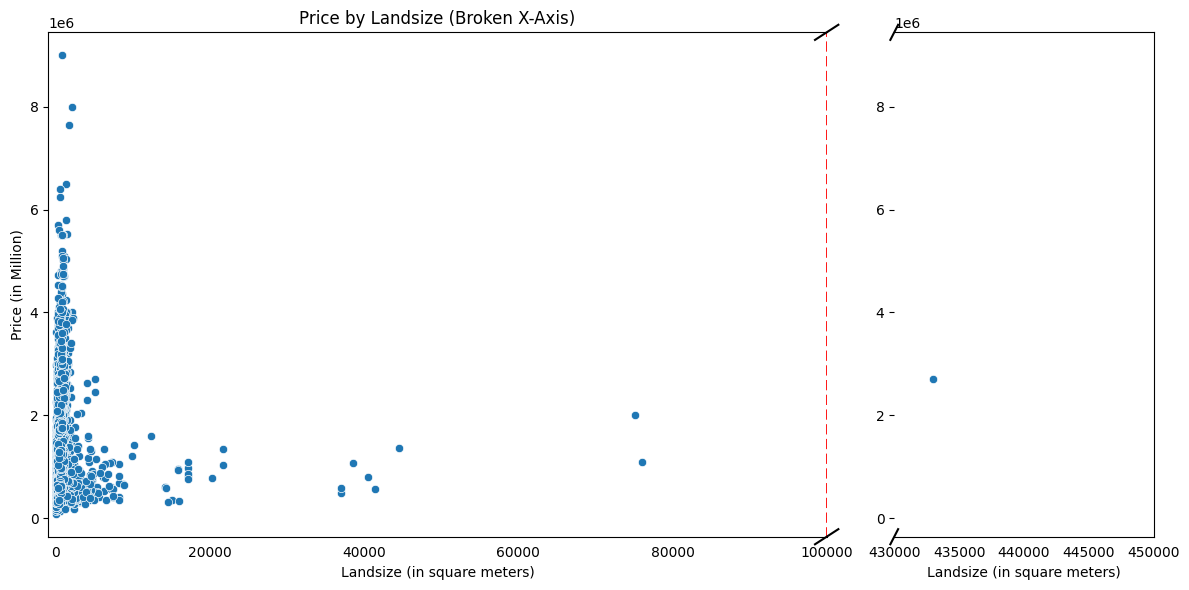

In [29]:


# Create the figure and gridspec
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])  # Adjust width ratios for subplots

# Create subplots with the specified width ratios
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharey=ax1)

# Plot the first range (0-100000)
sns.scatterplot(x='Landsize', y='Price', data=data, ax=ax1)
ax1.set_xlim(-1000, 100000)  # Adjusted range
ax1.set_title("Price by Landsize (Broken X-Axis)")
ax1.set_xlabel('Landsize (in square meters)')
ax1.set_ylabel('Price (in Million)')
ax1.axvline(x=100000, color='red', linestyle='--', linewidth=2)  # Vertical line at the break

# Plot the second range (430000-450000)
sns.scatterplot(x='Landsize', y='Price', data=data, ax=ax2)
ax2.set_xlim(430000, 450000)  # Adjusted range
ax2.set_xlabel('Landsize (in square meters)')
ax2.set_ylabel('')

# Add "broken axis" effect: remove spines and add slashes
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=False, top=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False)

# Add diagonal lines to indicate the break
d = 0.015  # Size of diagonal line
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal for ax1
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal for ax1

kwargs.update(transform=ax2.transAxes)  # Switch to ax2
ax2.plot((-d, +d), (-d, +d), **kwargs)  # Top-left diagonal for ax2
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal for ax2

plt.tight_layout()
plt.show()



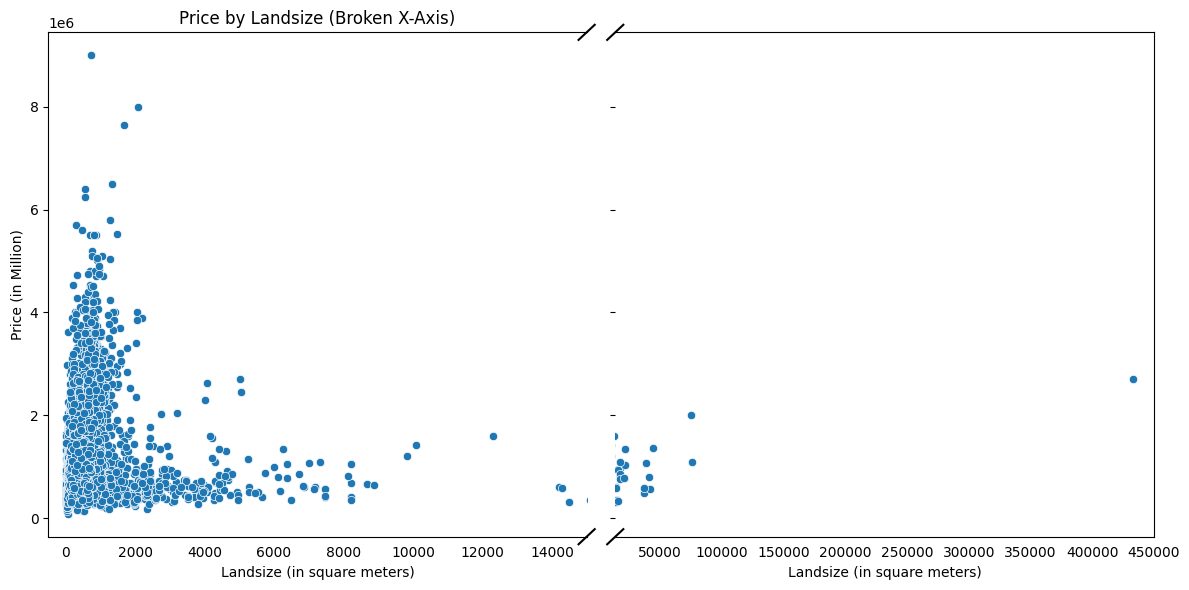

In [ ]:
# Scatterplot with broken x-axis for Landsize

# Create the figure and two subplots with shared y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))

# Adjust space between  the two plots to indicate a break
fig.subplots_adjust(wspace=0.05)

# Plot the first range (0-100000)
sns.scatterplot(x='Landsize', y='Price', data=data, ax=ax1)
ax1.set_xlim(-500, 15000)
ax1.set_title("Price by Landsize (Broken X-Axis)")
ax1.set_xlabel('Landsize (in square meters)')
ax1.set_ylabel('Price (in Million)')

# Plot the second range (350000-400000)
sns.scatterplot(x='Landsize', y='Price', data=data, ax=ax2)
ax2.set_xlim(13500, 450000)
ax2.set_xlabel('Landsize (in square meters)')
ax2.set_ylabel('')

# Add "broken axis" effect: remove spines and add slashes
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=False, top=False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False)

# Add diagonal lines to indicate the break
d = 0.015  # size of diagonal line
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal for ax1
ax1.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal for ax1

kwargs.update(transform=ax2.transAxes)  # Switch to ax2
ax2.plot((-d, +d), (-d, +d), **kwargs)  # top-left diagonal for ax2
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal for ax2

plt.tight_layout()
plt.show()


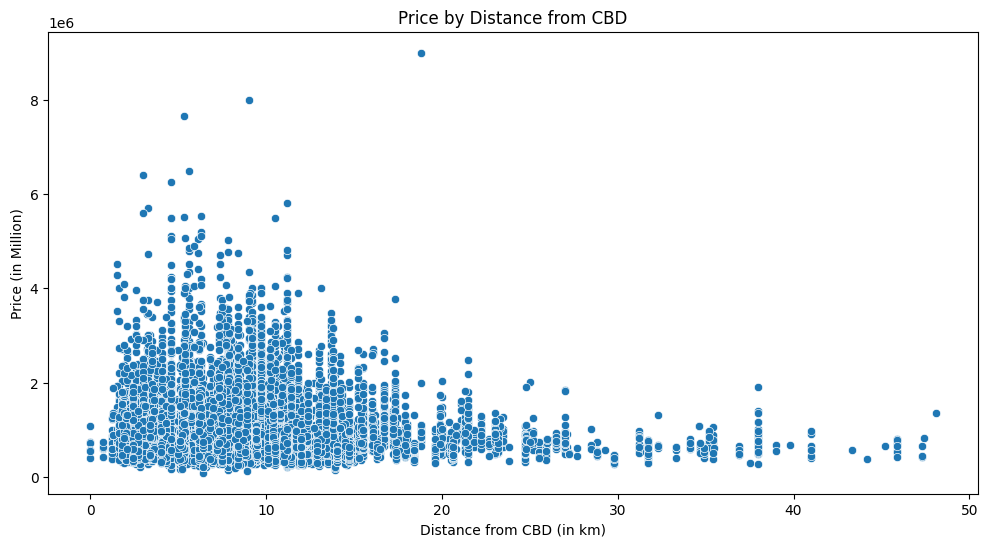

In [31]:
# Scatterplot Distance from CBD
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Distance', y='Price', data=data)
plt.title("Price by Distance from CBD")
plt.xlabel('Distance from CBD (in km)')
plt.ylabel('Price (in Million)')
plt.show()

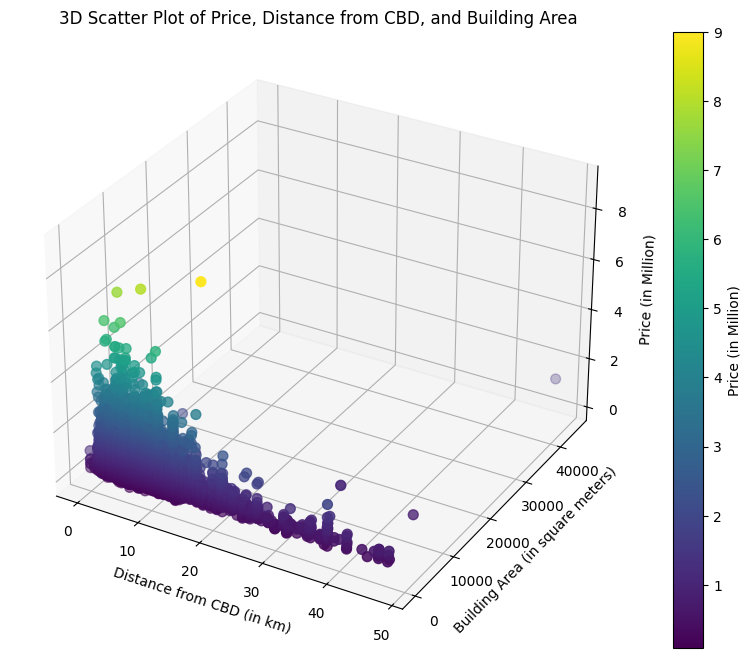

In [32]:
from mpl_toolkits.mplot3d import Axes3D

# Filter out rows with missing BuildingArea values
filtered_data = data.dropna(subset=['BuildingArea'])

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
sc = ax.scatter(filtered_data['Distance'], filtered_data['BuildingArea'], filtered_data['Price'] / 1e6, c=filtered_data['Price'] / 1e6, cmap='viridis', s=50)

# Add color bar
cbar = plt.colorbar(sc)
cbar.set_label('Price (in Million)')

# Set labels
ax.set_xlabel('Distance from CBD (in km)')
ax.set_ylabel('Building Area (in square meters)')
ax.set_zlabel('Price (in Million)')
ax.set_title('3D Scatter Plot of Price, Distance from CBD, and Building Area')

plt.show()

(same issue as above...)

to do:
- add third dimension in scatter plot for distance, price (adding: building area)
- try log for landsize to make the graph prettier
- region plot (if we have extra time)